# Import data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Carseats.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Normality Test

In [4]:
from scipy import stats

In [5]:
stats.kstest(data["Sales"], 'norm')

KstestResult(statistic=0.9666322582846675, pvalue=0.0, statistic_location=2.52, statistic_sign=-1)

Karena nilai sig. = 0.000 <  0.05 = α. Maka H0 ditolak. Artinya data variabel dependen (Sales) diambil dari populasi yang tidak berdistribusi normal. Jadi asumsi normalitas data dependen untuk melakukan uji regresi linear berganda tidak terpenuhi. Sehingga data variabel dependen tidak dapat digunakan untuk melakukan pengujian lebuh lanjut. namun untuk keperluan lebih lanjut maka kita asumsikan berdistribusi normal.

# Linearitas 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
mydata =data[["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education"]]

<Axes: >

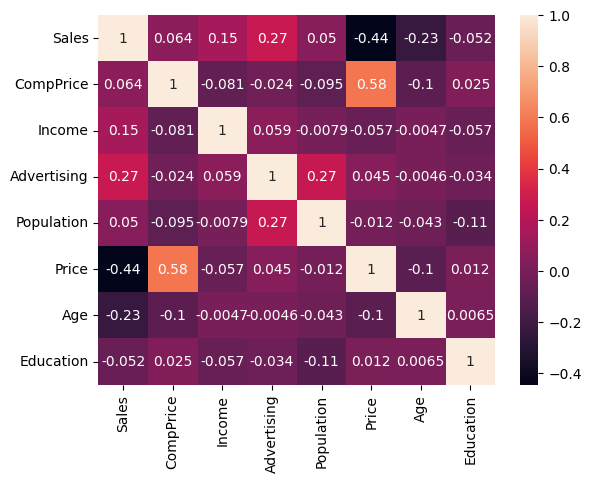

In [8]:
%matplotlib inline
correlation = mydata.corr()
sns.heatmap(correlation,annot=True)

# Linear Regression

Make Dummies Variable

In [9]:
dms = pd.get_dummies(data[['ShelveLoc',"Urban","US"]])

In [10]:
dms

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,True,False,False,False,True,False,True
1,False,True,False,False,True,False,True
2,False,False,True,False,True,False,True
3,False,False,True,False,True,False,True
4,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...
395,False,True,False,False,True,False,True
396,False,False,True,True,False,False,True
397,False,False,True,False,True,False,True
398,True,False,False,False,True,False,True


*   pada variable ShelveLoc akan dipilih ShelveLoc_Bad sebagai refference catagory 
*   pada variable Urban akan dipilih Urban_no sebagai refference catagory 
*   pada variable US akan dipilih US_no sebagai refference catagory 






In [11]:
mydata= pd.concat([data,dms], axis=1 )
mydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,False,True,False,False,True,False,True
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,False,False,True,True,False,False,True
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,False,False,True,False,True,False,True
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,True,False,False,False,True,False,True


In [12]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   ShelveLoc         400 non-null    object 
 7   Age               400 non-null    int64  
 8   Education         400 non-null    int64  
 9   Urban             400 non-null    object 
 10  US                400 non-null    object 
 11  ShelveLoc_Bad     400 non-null    bool   
 12  ShelveLoc_Good    400 non-null    bool   
 13  ShelveLoc_Medium  400 non-null    bool   
 14  Urban_No          400 non-null    bool   
 15  Urban_Yes         400 non-null    bool   
 16  US_No             400 non-null    bool   
 1

In [13]:
# Converti boolean to int
mydata["ShelveLoc_Bad"] = mydata["ShelveLoc_Bad"].astype(int)
mydata["ShelveLoc_Good"] = mydata["ShelveLoc_Good"].astype(int)
mydata["ShelveLoc_Medium"] = mydata["ShelveLoc_Medium"].astype(int)
mydata["Urban_No"] = mydata["Urban_No"].astype(int)
mydata["Urban_Yes"] = mydata["Urban_Yes"].astype(int)
mydata["US_No"] = mydata["US_No"].astype(int)
mydata["US_Yes"] = mydata["US_Yes"].astype(int)


subsetting data for regression linear

In [14]:
data_reg=mydata[["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","Urban_Yes","US_Yes"]]
data_reg

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


Begin Multiple Linear Regression

In [15]:
import statsmodels.api as sm

# Model 1

make variable x & y

In [16]:
x = data_reg[["CompPrice","Income","Advertising","Population","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","Urban_Yes","US_Yes"]]

In [17]:
y = data_reg["Sales"]

add constant for x

In [18]:
x = sm.add_constant(x)

Create a model and fit it

In [19]:
model = sm.OLS(y,x)

In [20]:
results = model.fit()

Get results

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.60e-166
Time:                        10:35:37   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603  

In [22]:
results.aic

1161.9743520348259

# Model 2

In [23]:
x2 = data_reg[["CompPrice","Income","Advertising","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","Urban_Yes","US_Yes"]]
y = data_reg["Sales"]

add constant for x

In [24]:
x2 = sm.add_constant(x2)

Create a model and fit it

In [25]:
model2 = sm.OLS(y, x2)

In [26]:
results2 = model2.fit()

Get results

In [27]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.11e-167
Time:                        10:35:38   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7619      0.575  

# Model 3

In [28]:
x3 = data_reg[["CompPrice","Income","Advertising","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","US_Yes"]]
y = data_reg["Sales"]

add constant for x

In [29]:
x3 = sm.add_constant(x3)

Create a model and fit it

In [30]:
model3 = sm.OLS(y, x3)

In [31]:
results3 = model3.fit()

Get results

In [32]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.09e-168
Time:                        10:35:38   Log-Likelihood:                -569.72
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     390   BIC:                             1199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8140      0.573  

# Model 4

In [33]:
x4 = data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium","US_Yes"]]
y = data_reg["Sales"]

add constant for x

In [34]:
x4 = sm.add_constant(x4)

Create a model and fit it

In [35]:
model4 = sm.OLS(y, x4)

In [36]:
results4 = model4.fit()

Get results

In [37]:
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.16e-169
Time:                        10:35:38   Log-Likelihood:                -570.43
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4928      0.505  

# Model 5

In [38]:
x5 = data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]]
y = data_reg["Sales"]

add constant for x

In [39]:
x5 = sm.add_constant(x5)

Create a model and fit it

In [40]:
model5 = sm.OLS(y, x5)

In [41]:
results5 = model5.fit()

Get results

In [42]:
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.25e-170
Time:                        10:35:39   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4752      0.505  

# Model Selection 

In [43]:
select = {'AIC':[results.aic, results2.aic, results3.aic, results4.aic, results5.aic],
        'BIC':[results.bic, results2.bic, results3.bic, results4.bic, results5.bic]}

In [44]:
df = pd.DataFrame(select)

In [45]:
print(df)

           AIC          BIC
0  1161.974352  1209.871927
1  1160.298835  1204.204945
2  1159.441881  1199.356527
3  1158.868065  1194.791246
4  1158.470309  1190.402025


Dipilih model terbaik adalah model ke 5 karena nilai AIC dan BIC terendah 

# Diagnostic Checking pada Model ke 5
1. Fix independen variabel: diasumsikan
terpenuhi
2. Linearitas dependen dengan independen
Untuk mengetahui ada tidaknya hubungan
linear antara variabel independen dengan
variabel dependen.
3. Normalitas residual
Untuk mengetahui residual berdistribusi
normal atau tidak
4. Homoskedastisitas
Kondisi dimana variansi konstan. Terpenuhi
jika variansi residual konstan, dilihat dari plot
z resid by z pred.
Dikatakan homoskedastisitas jika titik-titik
mendekati nol dan tidak membentuk pola.
5. No multikolinearitas
Kondisi dimana tidak ada hubungan antar
variabel independen. Terpenuhi jika VIF< 10
dan TOL > 0,1 (lihat di tabel coefficients)
6. No autokorelasi
Kondisi dimana tidak ada korelasi antar eror. 

In [46]:
#Normalitas Residual

'''
H0  : Residuals are normally distributed
H1  : Residuals are not normally distributed
Rejet H0 if P-Value < alpha = 0,05
'''
alpha = 0.05
name = ['Chi^2', 'Two-tail probability']
test = sm.stats.omni_normtest(results5.resid)
print(test,'\n')

if test.pvalue < 0.05 :
  print('Pvalue < 0.05, reject H0, Residuals are not normally distributed')
else  :
  print ('Pvalue > 0.05, fail to reject H0, Residuals are normally distributed')

NormaltestResult(statistic=0.7655306307630756, pvalue=0.6819729290636511) 

Pvalue > 0.05, fail to reject H0, Residuals are normally distributed


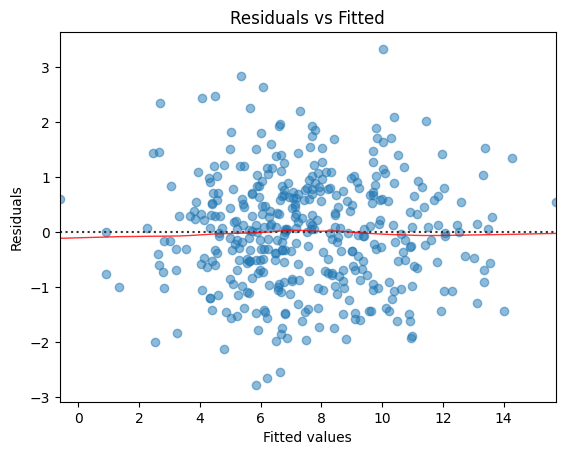

In [47]:
#Homoskedastistas

# fitted values
model_fitted_y = results5.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Sales', data=data_reg, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

#karena titik berada disekitar garis 0 dan tersebar secara random, maka dikatakan asumsi homoskedastisitas terpenuhi

In [48]:
#No multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]].columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]].values, i)
                          for i in range(len(data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]].columns))]
  
print(vif_data)

'''
Dapat disimpulkan bahwa asumsi No Multikolinearitas tidak terpenuhi
'''

            feature        VIF
0         CompPrice  53.049570
1            Income   6.390116
2       Advertising   2.004628
3             Price  38.288755
4               Age   9.982259
5    ShelveLoc_Good   1.878286
6  ShelveLoc_Medium   3.243449


'\nDapat disimpulkan bahwa asumsi No Multikolinearitas tidak terpenuhi\n'

In [50]:
#No Autokorelasi
sm.stats.durbin_watson(results5.resid)


1.988165390700888

In [51]:
'''
Dapat disimpulkan bahwa asumsi No Autokorelasi terpenuhi. 
'''


'\nDapat disimpulkan bahwa asumsi No Autokorelasi terpenuhi. \n'